In [1]:
import os
import pandas as pd
import numpy as np
from nilearn import image, input_data
from statsmodels.tsa.stattools import grangercausalitytests
import sys
import nibabel as nib

# Import your parameters
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'
sys.path.insert(0, curr_dir)
import ptoc_params as params

# Set up directories and parameters
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
raw_dir = params.raw_dir
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')
subs = ['sub-025']  # Update this list as needed
rois = ['pIPS', 'LO']  # We'll analyze the relationship between these two ROIs
hemispheres = ['left', 'right']
run_num = 3
runs = list(range(1, run_num + 1))
run_combos = [[rn1, rn2] for rn1 in range(1, run_num + 1) for rn2 in range(rn1 + 1, run_num + 1)]

/home/csimmon2/anaconda3/envs/fmri/lib/python3.9/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
import pandas as pd
ss = 'sub-025'  

# Replace with your actual file path
results_file = f'{study_dir}/{ss}/ses-01/derivatives/gca/{ss}_gca_results.csv'

# Read the CSV file
results = pd.read_csv(results_file)

# Display the first few rows
print(results.head())

# Get some basic statistics
print(results.describe())

# results for a specific condition or hemisphere
print(results[results['condition'] == 'Object'])
print(results[results['hemisphere'] == 'left'])

   run_combo hemisphere condition    f_diff
0          0       left    Object  3.119555
1          1       left    Object  1.390529
2          2       left    Object -0.377385
3          0      right    Object  7.910501
4          1      right    Object  0.014064
       run_combo    f_diff
count   6.000000  6.000000
mean    1.000000  2.231307
std     0.894427  3.042430
min     0.000000 -0.377385
25%     0.250000  0.343192
50%     1.000000  1.360553
75%     1.750000  2.687299
max     2.000000  7.910501
   run_combo hemisphere condition    f_diff
0          0       left    Object  3.119555
1          1       left    Object  1.390529
2          2       left    Object -0.377385
3          0      right    Object  7.910501
4          1      right    Object  0.014064
5          2      right    Object  1.330576
   run_combo hemisphere condition    f_diff
0          0       left    Object  3.119555
1          1       left    Object  1.390529
2          2       left    Object -0.377385


Summary of f_diff values by subject and hemisphere:
                        mean       std       min        max
subject hemisphere                                         
sub-025 left        1.377566  1.748506 -0.377385   3.119555
        right       3.085047  4.230491  0.014064   7.910501
sub-038 left       -1.145075  3.931375 -5.564603   1.962763
        right       3.231165  7.827981 -2.279191  12.191524

Overall statistics:
count    12.000000
mean      1.637176
std       4.599516
min      -5.564603
25%      -0.258474
50%       0.748596
75%       2.251961
max      12.191524
Name: f_diff, dtype: float64


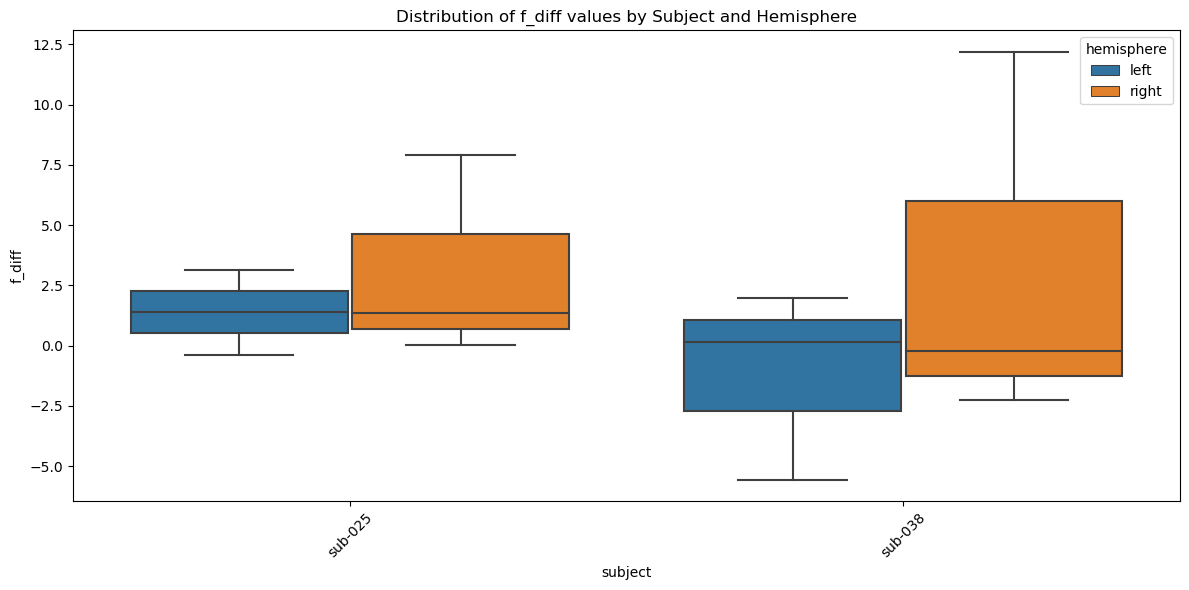

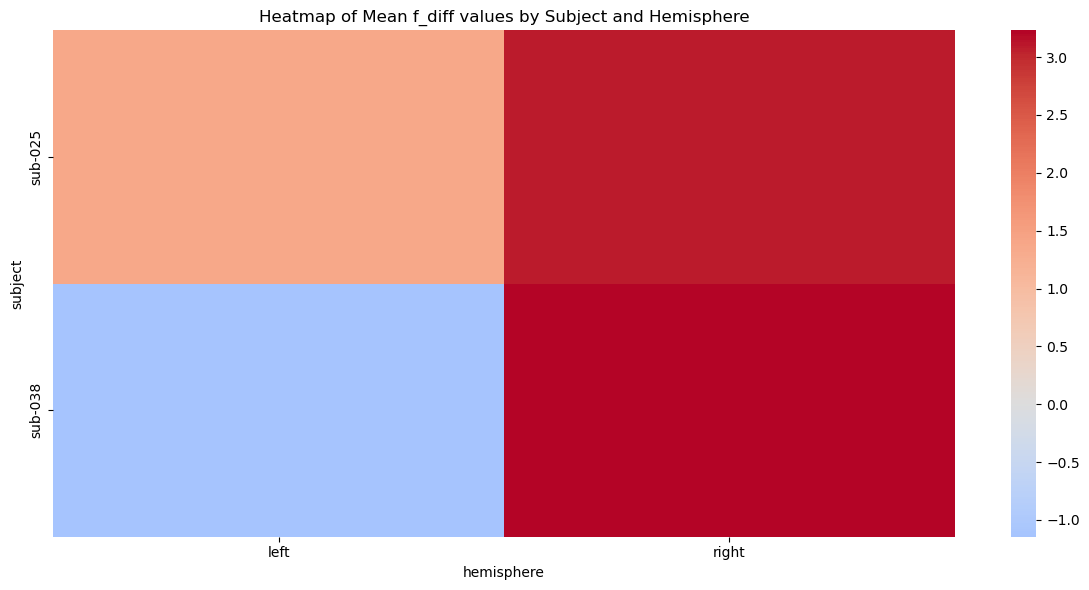

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
subs = ['sub-025', 'sub-038', 'sub-057', 'sub-059']  # Add all your subjects here

def review_native_space_gca(study_dir, subs):
    all_results = []

    for ss in subs:
        gca_results_path = f'{study_dir}/{ss}/ses-01/derivatives/gca/{ss}_gca_results.csv'
        if not os.path.exists(gca_results_path):
            print(f"Results not found for subject {ss}")
            continue

        gca_df = pd.read_csv(gca_results_path)
        gca_df['subject'] = ss
        all_results.append(gca_df)

    # Combine all results
    all_results_df = pd.concat(all_results, ignore_index=True)

    # Summary statistics
    summary = all_results_df.groupby(['subject', 'hemisphere'])['f_diff'].agg(['mean', 'std', 'min', 'max'])
    print("Summary of f_diff values by subject and hemisphere:")
    print(summary)

    # Visualizations
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='subject', y='f_diff', hue='hemisphere', data=all_results_df)
    plt.title('Distribution of f_diff values by Subject and Hemisphere')
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.savefig(f'{study_dir}/native_space_gca_boxplot.png')
    #plt.close()

    plt.figure(figsize=(12, 6))
    sns.heatmap(all_results_df.groupby(['subject', 'hemisphere'])['f_diff'].mean().unstack(), 
                cmap='coolwarm', center=0)
    plt.title('Heatmap of Mean f_diff values by Subject and Hemisphere')
    plt.tight_layout()
    #plt.savefig(f'{study_dir}/native_space_gca_heatmap.png')
    #plt.close()

    # Basic quality checks
    extreme_values = all_results_df[np.abs(all_results_df['f_diff']) > 3 * all_results_df['f_diff'].std()]
    if not extreme_values.empty:
        print("\nWarning: Extreme f_diff values detected:")
        print(extreme_values)

    zero_diff = all_results_df[all_results_df['f_diff'] == 0]
    if not zero_diff.empty:
        print("\nWarning: Zero f_diff values detected:")
        print(zero_diff)

    return all_results_df, summary

# Main execution
if __name__ == "__main__":
    # Define your study directory and subject list
    study_dir = "/lab_data/behrmannlab/vlad/ptoc"
    subs = ['sub-025', 'sub-038']  # Add all your subjects here

    all_results_df, summary = review_native_space_gca(study_dir, subs)

    # Additional analysis or printing can be done here
    print("\nOverall statistics:")
    print(all_results_df['f_diff'].describe())

    # You might want to save the combined results
    all_results_df.to_csv(f'{study_dir}/all_native_space_gca_results.csv', index=False)

In [12]:

import os
import pandas as pd
import numpy as np
from nilearn import image, input_data
from statsmodels.tsa.stattools import grangercausalitytests
import sys
import nibabel as nib

# Import your parameters
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'
sys.path.insert(0, curr_dir)
import ptoc_params as params

# Set up directories and parameters
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
raw_dir = params.raw_dir
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')
subs = ['sub-038', 'sub-057', 'sub-059', 'sub-064', 'sub-067']  # Update this list as needed
rois = ['pIPS', 'LO']  # We'll analyze the relationship between these two ROIs
hemispheres = ['left', 'right']
run_num = 3
runs = list(range(1, run_num + 1))
run_combos = [[rn1, rn2] for rn1 in range(1, run_num + 1) for rn2 in range(rn1 + 1, run_num + 1)]

def extract_roi_sphere(img, coords):
    #roi_masker = input_data.NiftiSpheresMasker([tuple(coords)], radius=6)
    roi_masker = input_data.NiftiSpheresMasker([tuple(coords)], radius=6, standardize=False, memory='nilearn_cache', memory_level=1)
    seed_time_series = roi_masker.fit_transform(img)
    return np.mean(seed_time_series, axis=1).reshape(-1, 1)

def extract_condition_timeseries(runs, ss):
    temp_dir = f'{raw_dir}/{ss}/ses-01'
    cov_dir = f'{temp_dir}/covs'
    vols, tr = 184, 2.0
    times = np.arange(0, vols * len(runs) * tr, tr)
    
    object_timeseries = np.zeros(len(times))
    
    for rn in runs:
        ss_num = ss.split('-')[1]
        obj_cov_file = f'{cov_dir}/catloc_{ss_num}_run-0{rn}_Object.txt'
        
        if not os.path.exists(obj_cov_file):
            print(f'Covariate file not found for run {rn}')
            continue
        
        obj_cov = pd.read_csv(obj_cov_file, sep='\t', header=None, names=['onset', 'duration', 'value'])
        
        # Adjust onsets for current run
        obj_cov['onset'] += (rn - 1) * vols * tr
        
        # Create binary timeseries for object condition
        for _, row in obj_cov.iterrows():
            start = int(row['onset'] / tr)
            end = int((row['onset'] + row['duration']) / tr)
            object_timeseries[start:end] = 1
    
    return object_timeseries

def conduct_gca(roi1_ts, roi2_ts, condition_timeseries):
    # Ensure all timeseries have the same length
    min_length = min(roi1_ts.shape[0], roi2_ts.shape[0], len(condition_timeseries))
    roi1_ts = roi1_ts[:min_length]
    roi2_ts = roi2_ts[:min_length]
    condition_timeseries = condition_timeseries[:min_length]
    
    # Extract condition-specific timeseries
    condition_mask = condition_timeseries == 1
    roi1_condition = roi1_ts[condition_mask]
    roi2_condition = roi2_ts[condition_mask]
    
    neural_ts = pd.DataFrame({'roi1': np.squeeze(roi1_condition), 'roi2': np.squeeze(roi2_condition)})
    
    gc_res_1to2 = grangercausalitytests(neural_ts[['roi2', 'roi1']], 1, verbose=False)
    gc_res_2to1 = grangercausalitytests(neural_ts[['roi1', 'roi2']], 1, verbose=False)
    
    f_diff = gc_res_1to2[1][0]['ssr_ftest'][0] - gc_res_2to1[1][0]['ssr_ftest'][0]
    
    return f_diff

def conduct_gca_analyses():
    for ss in subs:
        print(f"Processing subject: {ss}")
        sub_dir = f'{study_dir}/{ss}/ses-01/'
        roi_dir = f'{sub_dir}derivatives/rois'
        temp_dir = f'{raw_dir}/{ss}/ses-01/derivatives/fsl/loc'
        
        roi_coords = pd.read_csv(f'{roi_dir}/spheres/sphere_coords_hemisphere.csv')
        
        out_dir = f'{study_dir}/{ss}/ses-01/derivatives'
        os.makedirs(f'{out_dir}/gca', exist_ok=True)
        
        gca_results = []
        
        for tsk in ['loc']:
            for hemi in hemispheres:
                for rcn, rc in enumerate(run_combos):
                    pips_coords = roi_coords[(roi_coords['index'] == rcn) & 
                                             (roi_coords['task'] == tsk) & 
                                             (roi_coords['roi'] == 'pIPS') & 
                                             (roi_coords['hemisphere'] == hemi)][['x', 'y', 'z']].values.tolist()[0]
                    
                    lo_coords = roi_coords[(roi_coords['index'] == rcn) & 
                                           (roi_coords['task'] == tsk) & 
                                           (roi_coords['roi'] == 'LO') & 
                                           (roi_coords['hemisphere'] == hemi)][['x', 'y', 'z']].values.tolist()[0]
                    
                    filtered_list = [image.clean_img(nib.load(f'{temp_dir}/run-0{rn}/1stLevel.feat/filtered_func_data_reg.nii.gz'), standardize=True) for rn in rc]
                    img4d = image.concat_imgs(filtered_list)
                    
                    pips_ts = extract_roi_sphere(img4d, pips_coords)
                    lo_ts = extract_roi_sphere(img4d, lo_coords)
                    
                    object_timeseries = extract_condition_timeseries(rc, ss)
                    
                    f_diff = conduct_gca(pips_ts, lo_ts, object_timeseries)
                    gca_results.append({
                        'run_combo': rcn,
                        'hemisphere': hemi,
                        'condition': 'Object',
                        'f_diff': f_diff
                    })
        
        # Save GCA results
        gca_df = pd.DataFrame(gca_results)
        gca_df.to_csv(f'{out_dir}/gca/{ss}_gca_results.csv', index=False)
        print(f'Saved GCA results for {ss}')

if __name__ == "__main__":
    conduct_gca_analyses()


Processing subject: sub-038
Saved GCA results for sub-038
Processing subject: sub-057
Saved GCA results for sub-057
Processing subject: sub-059
Saved GCA results for sub-059
Processing subject: sub-064


   run_combo hemisphere condition    f_diff
0          0       left    Object  3.119555
1          1       left    Object  1.390529
2          2       left    Object -0.377385
3          0      right    Object  7.910501
4          1      right    Object  0.014064
run_combo       int64
hemisphere     object
condition      object
f_diff        float64
dtype: object


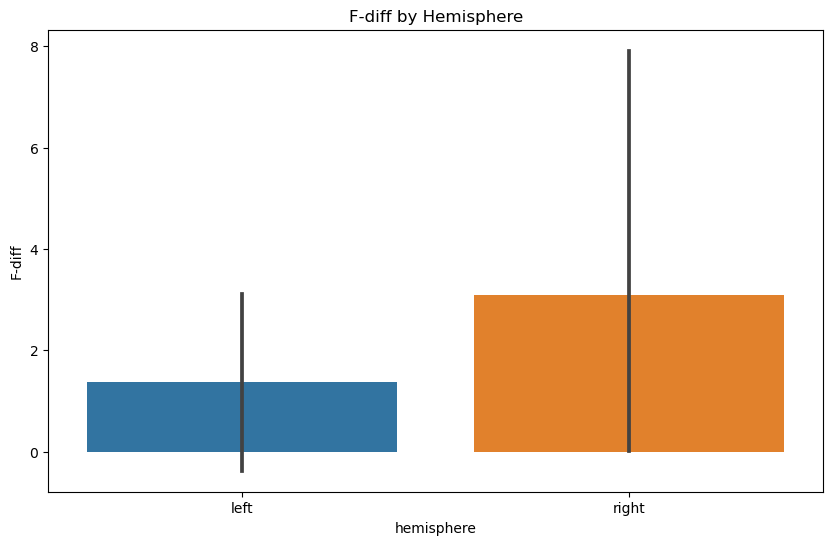

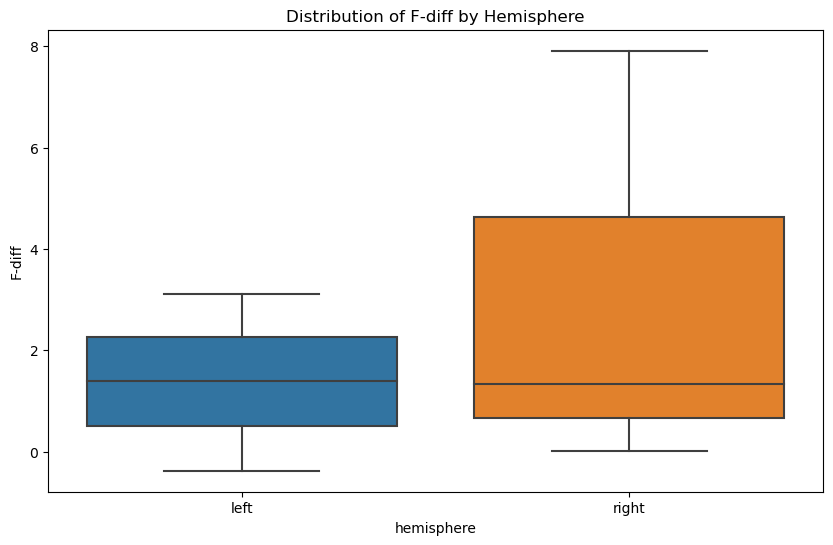


Summary Statistics:
                mean    median       std       min       max
hemisphere                                                  
left        1.377566  1.390529  1.748506 -0.377385  3.119555
right       3.085047  1.330576  4.230491  0.014064  7.910501


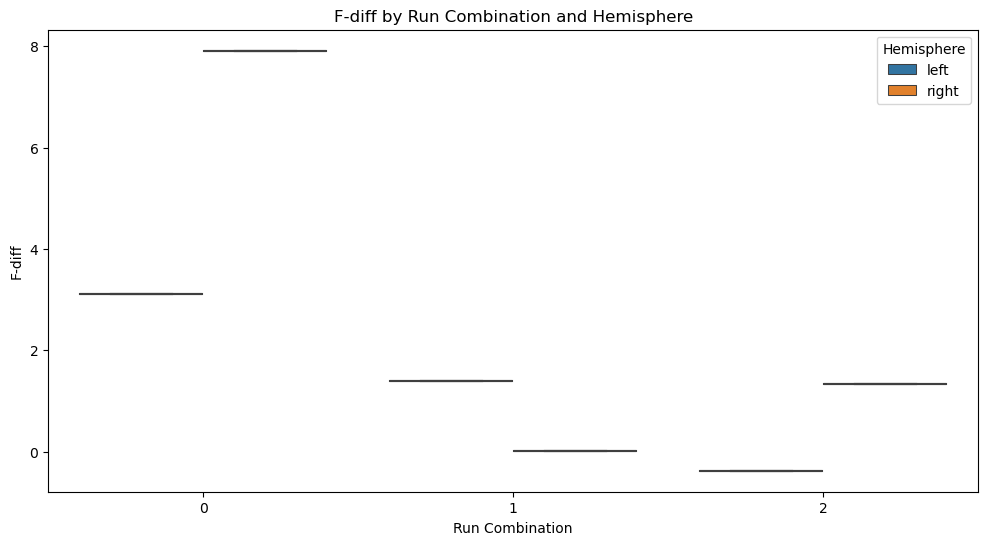

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the path to your CSV file
subject = 'sub-025'  # or whichever subject you're working with
study_dir = "/lab_data/behrmannlab/vlad/ptoc"
gca_results_path = f'{study_dir}/{subject}/ses-01/derivatives/gca/{subject}_gca_results.csv'

# Read the CSV file
results = pd.read_csv(gca_results_path)

# Print the first few rows to verify the data
print(results.head())

# Print column names and data types
print(results.dtypes)

# Create a bar plot of f_diff for each hemisphere
plt.figure(figsize=(10, 6))
sns.barplot(x='hemisphere', y='f_diff', data=results)
plt.title('F-diff by Hemisphere')
plt.ylabel('F-diff')
plt.show()

# Create a box plot of f_diff for each hemisphere
plt.figure(figsize=(10, 6))
sns.boxplot(x='hemisphere', y='f_diff', data=results)
plt.title('Distribution of F-diff by Hemisphere')
plt.ylabel('F-diff')
plt.show()

# Calculate and print summary statistics
summary_stats = results.groupby('hemisphere')['f_diff'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nSummary Statistics:")
print(summary_stats)

# If you have multiple run combinations, you might want to visualize that as well
plt.figure(figsize=(12, 6))
sns.boxplot(x='run_combo', y='f_diff', hue='hemisphere', data=results)
plt.title('F-diff by Run Combination and Hemisphere')
plt.ylabel('F-diff')
plt.xlabel('Run Combination')
plt.legend(title='Hemisphere')
plt.show()

# Save the summary statistics to a CSV file
#summary_stats.to_csv(f'{study_dir}/{subject}/ses-01/derivatives/gca/{subject}_gca_summary_stats.csv')
#print(f"\nSummary statistics saved to: {study_dir}/{subject}/ses-01/derivatives/gca/{subject}_gca_summary_stats.csv")